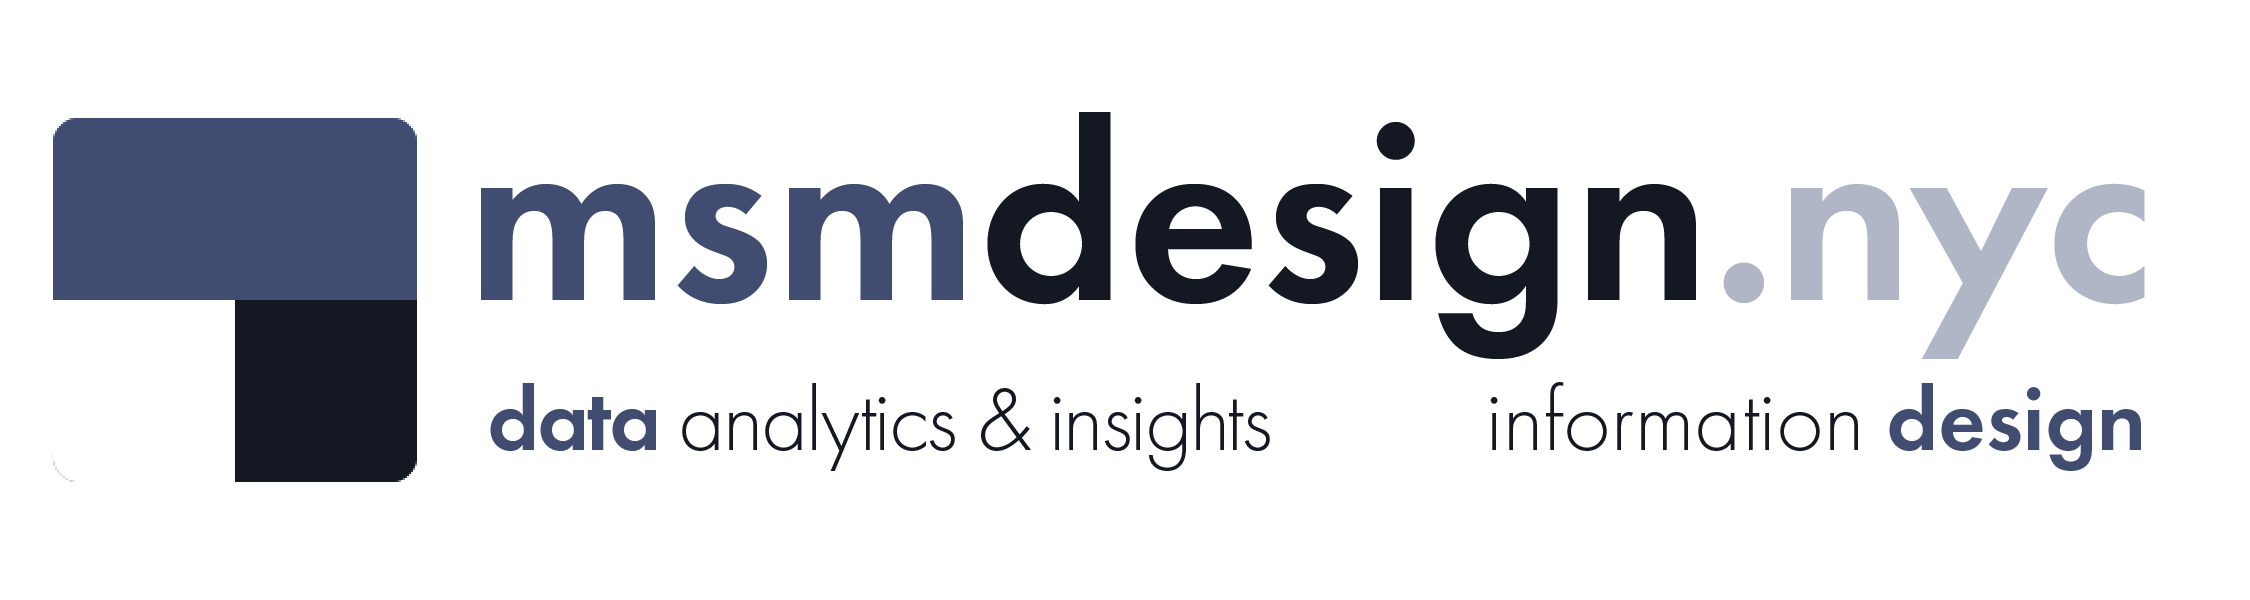

---
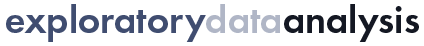

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.


**Dataset Analyzed:** *NYC Business Acceleration Businesses Served and Jobs Created*

**About This Dataset:** The list tracks the number of businesses that NYC Business Acceleration has assisted in opening and how many jobs were created by those businesses. Data provided by Department of Small Business Services (SBS), the City of New York: https://data.cityofnewyork.us/Business/NYC-Business-Acceleration-Businesses-Served-and-Jo/9b9u-8989



**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** MSM-029


**EDA Publication Date:** Monday, November 1, 2021


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

## **0. Setup the workspace**

In [2]:
# import the libraries we'll need for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the data stored in the csv file (hosted on GitHub) and store it in a variable

nyc_biz = pd.read_csv('https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/DS-NYC-001-NYC_Business_Acceleration_Businesses_Served_and_Jobs_Created.csv', encoding = 'UTF-8')

In [4]:
# display the first few and the last few lines of the dataframe to confirm that the data has loaded correctly

nyc_biz.head()

,DBA,Establishment Street,Establishment Zip,Establishment Borough,Business Sector,Establishment Category,Type of Cuisine,Number Of Employees,Actual Opening Date
0,Orchard Grocer Inc,78 Orchard St,10002,Manhattan,Accommodations and Food,Restaurants and Other Eating Places,NaN,NaN,02/01/2017
1,Palermo Salumeria,33-35 Francis Lewis Blvd,11358,Queens,NaN,NaN,NaN,NaN,NaN
2,Foragers City Grocers,300 West 22nd Street,10011,Manhattan,NaN,NaN,NaN,NaN,NaN
3,Cultural Xchange,35 Lafayette Ave,11217,Brooklyn,NaN,NaN,NaN,3,NaN
4,ST. JOHNS CHURCH,90-37 213 Street,11428,Queens,NaN,NaN,NaN,NaN,NaN


In [5]:
nyc_biz.tail(3)

,DBA,Establishment Street,Establishment Zip,Establishment Borough,Business Sector,Establishment Category,Type of Cuisine,Number Of Employees,Actual Opening Date
5223,Casa Taqueria,40 Gold St.,10038,Manhattan,Accommodations and Food,Restaurants and Other Eating Places,NaN,NaN,05/07/2019
5224,Ono Bowls,2655 Richmond Ave. (in Staten Island Mall),10304,Staten Island,Accommodations and Food,Restaurants and Other Eating Places,Juice Bar,NaN,05/09/2019
5225,Chicago Pizza with a Twist,259-07 Hillside Ave,11004,Queens,Accommodations and Food,Restaurants and Other Eating Places,Pizza,NaN,05/01/2019


## **1. Wrap our heads around what is contained in the dataset**

In [7]:
# how many rows and columns are contained in our dataset?

nyc_biz.shape

(5226, 9)

In [8]:
# what is the index (set of row labels) for our dataset?

nyc_biz.index

RangeIndex(start=0, stop=5226, step=1)

In [10]:
# what are the columns of our datset?

nyc_biz.columns

Index(['DBA', 'Establishment Street', 'Establishment Zip',
       'Establishment Borough', 'Business Sector', 'Establishment Category',
       'Type of Cuisine', 'Number Of Employees', 'Actual Opening Date'],
      dtype='object')

In [11]:
# what kind of data does each column in our dataset hold? are there any missing (or null) values?

nyc_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DBA                     5226 non-null   object
 1   Establishment Street    5226 non-null   object
 2   Establishment Zip       5220 non-null   object
 3   Establishment Borough   5220 non-null   object
 4   Business Sector         3977 non-null   object
 5   Establishment Category  3889 non-null   object
 6   Type of Cuisine         3157 non-null   object
 7   Number Of Employees     3851 non-null   object
 8   Actual Opening Date     5005 non-null   object
dtypes: object(9)
memory usage: 367.6+ KB


In [12]:
# change the data types of our columns so we can better analyze the data

nyc_biz['Business Sector'] = nyc_biz['Business Sector'].astype('category')

nyc_biz['Establishment Zip'] = nyc_biz['Establishment Zip'].astype('category')

nyc_biz['Establishment Borough'] = nyc_biz['Establishment Borough'].astype('category')

nyc_biz['Business Sector'] = nyc_biz['Business Sector'].astype('category')

nyc_biz['Establishment Category'] = nyc_biz['Establishment Category'].astype('category')

nyc_biz['Type of Cuisine'] = nyc_biz['Type of Cuisine'].astype('category')

nyc_biz['Number Of Employees'] = pd.to_numeric(nyc_biz['Number Of Employees'], errors='coerce')

nyc_biz['Actual Opening Date'] = pd.to_datetime(nyc_biz['Actual Opening Date'])

In [13]:
# confirm that the changes to our data types have been performed correctly

nyc_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     5226 non-null   object        
 1   Establishment Street    5226 non-null   object        
 2   Establishment Zip       5220 non-null   category      
 3   Establishment Borough   5220 non-null   category      
 4   Business Sector         3977 non-null   category      
 5   Establishment Category  3889 non-null   category      
 6   Type of Cuisine         3157 non-null   category      
 7   Number Of Employees     3846 non-null   float64       
 8   Actual Opening Date     5005 non-null   datetime64[ns]
dtypes: category(5), datetime64[ns](1), float64(1), object(2)
memory usage: 222.5+ KB


In [14]:
# display summary statistics on the numerical variables contained in our dataset

nyc_biz.describe(include=[np.number])

,Number Of Employees
count,3846.000000
mean,14.603484
std,30.467362
min,0.000000
25%,3.000000
50%,6.000000
75%,15.000000
max,500.000000


In [15]:
# display summary statistics for the categorical variables contained in our dataset

nyc_biz.describe(include=['category'])

,Establishment Zip,Establishment Borough,Business Sector,Establishment Category,Type of Cuisine
count,5220,5220,3977,3889,3157
unique,333,7,9,30,330
top,10002,Manhattan,Accommodations and Food,Restaurants and Other Eating Places,American
freq,140,1981,3625,3274,809


In [16]:
# what is the earliest business opening date in our dataset?

min_year = nyc_biz['Actual Opening Date'].min()
min_year

Timestamp('2005-01-01 00:00:00')

In [17]:
# what is the most recent opening date in our dataset?

max_year = nyc_biz['Actual Opening Date'].max()
max_year

Timestamp('2019-08-08 00:00:00')

**First impressions of our dataset:**

- our dataset is 9 columns wide and 5226 rows long
- each row is a business
- several of the columns contain information on the different categories that each business falls into
- some of the categorical data is missing or null
- the numeric columns are 'Actual Opening Date' and 'Number of Employees'
- some of the numerical data is missing or null

## **2. Identify and subset the data that's relevant to our research**

In [18]:
# select the columns we want to explore further and store them in a variable

nyc_biz_data = nyc_biz.loc[:,['DBA','Establishment Borough', 'Business Sector', 'Establishment Category', 'Number Of Employees']]

In [27]:
# display the first few lines of the new dataframe to confirm that the data has loaded correctly

nyc_biz_data.head()

,DBA,Establishment Borough,Business Sector,Establishment Category,Number Of Employees
0,Orchard Grocer Inc,Manhattan,Accommodations and Food,Restaurants and Other Eating Places,NaN
1,Palermo Salumeria,Queens,NaN,NaN,NaN
2,Foragers City Grocers,Manhattan,NaN,NaN,NaN
3,Cultural Xchange,Brooklyn,NaN,NaN,3.0
4,ST. JOHNS CHURCH,Queens,NaN,NaN,NaN


**Let's take a closer look at the following variables:**
- DBA (the name of each business)
- Establishment Borough (the NYC borough where each business is located) 
- Business Sector
- Establishment Category
- Number of Employees

## **3. Summarize and describe the contents of the dataset**

<AxesSubplot:>

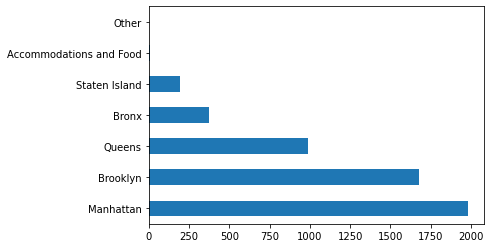

In [20]:
# create a bar graph that shows how many of the businesses are located in each nyc borough

nyc_biz_data['Establishment Borough'].value_counts().plot(kind='barh')

<AxesSubplot:>

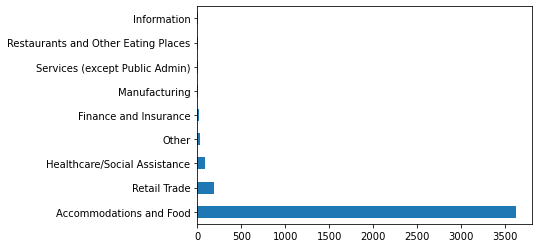

In [21]:
# create a bar graph that shows how many of the businesses are in each business sector

nyc_biz_data['Business Sector'].value_counts().plot(kind='barh')

<AxesSubplot:>

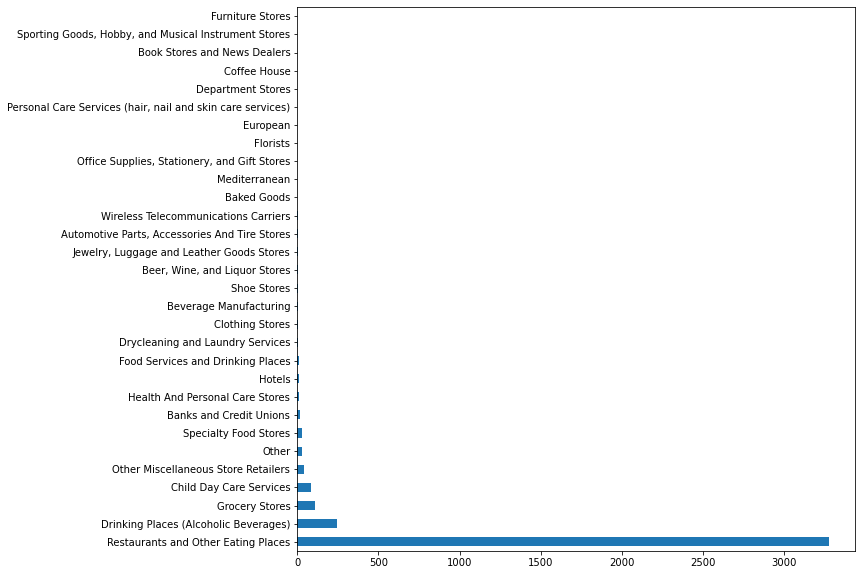

In [22]:
# create a bar graph that shows how many of the businesses are in each establishment category

nyc_biz_data['Establishment Category'].value_counts().plot(kind='barh', figsize=(10,10))

In [29]:
# how many people are emplyed by the businesses in our dataset

employees = nyc_biz_data['Number Of Employees'].sum()
employees

56165.0

In [20]:
# group the data by nyc borough and business sector
# display the number of employees for each group

boroughs = nyc_biz_data.groupby(['Establishment Borough', 'Business Sector']).sum('Number of Employees')
pd.set_option('display.max_rows',100)
boroughs

Number Of Employees
Establishment Borough   Business Sector                                         
Accommodations and Food Accommodations and Food                              0.0
                        Finance and Insurance                                0.0
                        Healthcare/Social Assistance                         0.0
                        Information                                          0.0
                        Manufacturing                                        0.0
                        Other                                                0.0
                        Restaurants and Other Eating Places                  0.0
                        Retail Trade                                         0.0
                        Services (except Public Admin)                       0.0
Bronx                   Accommodations and Food                           1621.0
                        Finance and Insurance                                0.0
                        Healthcare/Social Assistance                        23.0
                        Information                                         30.0
                        Manufacturing                                        4.0
                        Other                                               50.0
                        Restaurants and Other Eating Places                  0.0
                        Retail Trade                                      1828.0
                        Services (except Public Admin)                       0.0
Brooklyn                Accommodations and Food                           8067.0
                        Finance and Insurance                               45.0
                        Healthcare/Social Assistance                        43.0
                        Information                                          0.0
                        Manufacturing                                       13.0
                        Other                                              201.0
                        Restaurants and Other Eating Places                  0.0
                        Retail Trade                                      2221.0
                        Services (except Public Admin)                       8.0
Manhattan               Accommodations and Food                          16151.0
                        Finance and Insurance                              191.0
                        Healthcare/Social Assistance                        28.0
                        Information                                         40.0
                        Manufacturing                                       45.0
                        Other                                              126.0
                        Restaurants and Other Eating Places                  0.0
                        Retail Trade                                      1851.0
                        Services (except Public Admin)                      15.0
Other                   Accommodations and Food                              0.0
                        Finance and Insurance                                0.0
                        Healthcare/Social Assistance                         0.0
                        Information                                          0.0
                        Manufacturing                                        0.0
                        Other                                                0.0
                        Restaurants and Other Eating Places                  0.0
                        Retail Trade                                         0.0
                        Services (except Public Admin)                       0.0
Queens                  Accommodations and Food                           4503.0
                        Finance and Insurance                                0.0
                        Healthcare/Social Assistance                        55.0
           

## **4. Final takeaways** 

- Since its inception, the NYC Business Acceleration program has assisted more than 5,000 businesses.

- The vast majority of these businesses are in the accommodations and food sector.

- In all, the businesses employ more than 56,000 people.

***